In [1]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
import numpy as np
from sklearn.model_selection import train_test_split


# Load the dataset
file_path = '/content/drive/MyDrive/Friday-WorkingHours-Afternoon-PortScan.pcap_ISCX.csv'
data = pd.read_csv(file_path)

# Display the first few rows and column names
print(data.head())
print(data.columns)
print(len(data.columns))


    Destination Port   Flow Duration   Total Fwd Packets  \
0                 22         1266342                  41   
1                 22         1319353                  41   
2                 22             160                   1   
3                 22         1303488                  41   
4              35396              77                   1   

    Total Backward Packets  Total Length of Fwd Packets  \
0                       44                         2664   
1                       44                         2664   
2                        1                            0   
3                       42                         2728   
4                        2                            0   

    Total Length of Bwd Packets   Fwd Packet Length Max  \
0                          6954                     456   
1                          6954                     456   
2                             0                       0   
3                          6634                 

In [2]:

data.columns = data.columns.str.replace(' ', '')

print(data.columns)


Index(['DestinationPort', 'FlowDuration', 'TotalFwdPackets',
       'TotalBackwardPackets', 'TotalLengthofFwdPackets',
       'TotalLengthofBwdPackets', 'FwdPacketLengthMax', 'FwdPacketLengthMin',
       'FwdPacketLengthMean', 'FwdPacketLengthStd', 'BwdPacketLengthMax',
       'BwdPacketLengthMin', 'BwdPacketLengthMean', 'BwdPacketLengthStd',
       'FlowBytes/s', 'FlowPackets/s', 'FlowIATMean', 'FlowIATStd',
       'FlowIATMax', 'FlowIATMin', 'FwdIATTotal', 'FwdIATMean', 'FwdIATStd',
       'FwdIATMax', 'FwdIATMin', 'BwdIATTotal', 'BwdIATMean', 'BwdIATStd',
       'BwdIATMax', 'BwdIATMin', 'FwdPSHFlags', 'BwdPSHFlags', 'FwdURGFlags',
       'BwdURGFlags', 'FwdHeaderLength', 'BwdHeaderLength', 'FwdPackets/s',
       'BwdPackets/s', 'MinPacketLength', 'MaxPacketLength',
       'PacketLengthMean', 'PacketLengthStd', 'PacketLengthVariance',
       'FINFlagCount', 'SYNFlagCount', 'RSTFlagCount', 'PSHFlagCount',
       'ACKFlagCount', 'URGFlagCount', 'CWEFlagCount', 'ECEFlagCount',
       '

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 286467 entries, 0 to 286466
Data columns (total 79 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   DestinationPort          286467 non-null  int64  
 1   FlowDuration             286467 non-null  int64  
 2   TotalFwdPackets          286467 non-null  int64  
 3   TotalBackwardPackets     286467 non-null  int64  
 4   TotalLengthofFwdPackets  286467 non-null  int64  
 5   TotalLengthofBwdPackets  286467 non-null  int64  
 6   FwdPacketLengthMax       286467 non-null  int64  
 7   FwdPacketLengthMin       286467 non-null  int64  
 8   FwdPacketLengthMean      286467 non-null  float64
 9   FwdPacketLengthStd       286467 non-null  float64
 10  BwdPacketLengthMax       286467 non-null  int64  
 11  BwdPacketLengthMin       286467 non-null  int64  
 12  BwdPacketLengthMean      286467 non-null  float64
 13  BwdPacketLengthStd       286467 non-null  float64
 14  Flow

In [4]:
data.Label.nunique()


2

In [5]:
data.Label.value_counts()

PortScan    158930
BENIGN      127537
Name: Label, dtype: int64

In [6]:
benign_samples = data[data['Label'] == 'BENIGN'].sample(n=110000, random_state=42)
malicious_samples = data[data['Label'] == 'PortScan'].sample(n=110000, random_state=42)

# Combine the sampled data
data = pd.concat([benign_samples, malicious_samples])

# Shuffle the data
data = data.sample(frac=1, random_state=42).reset_index(drop=True)

In [7]:
data.Label.value_counts()

PortScan    110000
BENIGN      110000
Name: Label, dtype: int64

In [8]:


# Separate features and labels
features = data.drop('Label', axis=1)
labels = data['Label']

In [9]:
features.replace([np.inf, -np.inf], np.nan, inplace=True)  # Replace infinities with NaN
features.dropna(inplace=True)  # Drop rows with NaN values

In [10]:
features = features.select_dtypes(include=[float, int])


In [11]:
len(features)

219703

In [12]:
features

,DestinationPort,FlowDuration,TotalFwdPackets,TotalBackwardPackets,TotalLengthofFwdPackets,TotalLengthofBwdPackets,FwdPacketLengthMax,FwdPacketLengthMin,FwdPacketLengthMean,FwdPacketLengthStd,...,act_data_pkt_fwd,min_seg_size_forward,ActiveMean,ActiveStd,ActiveMax,ActiveMin,IdleMean,IdleStd,IdleMax,IdleMin
0,10566,32,1,1,2,6,2,2,2.000000,0.000000,...,0,24,0.0,0.0,0,0,0.0,0.0,0,0
1,6547,49,1,1,2,6,2,2,2.000000,0.000000,...,0,24,0.0,0.0,0,0,0.0,0.0,0,0
2,443,99294767,35,50,847,68696,245,0,24.200000,63.702803,...,6,32,432243.0,0.0,432243,432243,58800000.0,0.0,58800000,58800000
3,366,44,1,1,0,6,0,0,0.000000,0.000000,...,0,40,0.0,0.0,0,0,0.0,0.0,0,0
4,80,11292735,190,269,7303,411328,307,0,38.436842,92.366327,...,189,20,0.0,0.0,0,0,0.0,0.0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
219995,15660,49,1,1,2,6,2,2,2.000000,0.000000,...,0,24,0.0,0.0,0,0,0.0,0.0,0,0
219996,443,820876,10,8,2608,4527,1460,0,260.800000,461.151168,...,9,20,0.0,0.0,0,0,0.0,0.0,0,0
219997,49155,101,1,1,0,6,0,0,0.000000,0.000000,...,0,40,0.0,0.0,0,0,0.0,0.0,0,0
219998,49154,63,1,1,2,6,2,2,2.000000,0.000000,...,0,24,0.0,0.0,0,0,0.0,0.0,0,0


In [13]:
scaler = StandardScaler()
features_scaled = scaler.fit_transform(features)

In [14]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(labels)

In [15]:
round(data.shape[0]*80/100)

176000

In [16]:
missing_labels = np.isnan(y_encoded).sum()
print(f"Number of missing values in y_encoded: {missing_labels}")

Number of missing values in y_encoded: 0


In [17]:
train_size = round(len(y_encoded) * 0.8)

X_train = features_scaled[:train_size]
X_test = features_scaled[train_size:]
y_train = y_encoded[:train_size]
y_test = y_encoded[train_size:]

print(f"Length of X_train: {len(X_train)}")
print(f"Length of y_train: {len(y_train)}")
print(f"Length of X_test: {len(X_test)}")
print(f"Length of y_test: {len(y_test)}")

min_len = min(len(X_test), len(y_test))
X_test = X_test[:min_len]
y_test = y_test[:min_len]

print(f"Final Length of X_test: {len(X_test)}")
print(f"Final Length of y_test: {len(y_test)}")



Length of X_train: 176000
Length of y_train: 176000
Length of X_test: 43703
Length of y_test: 44000
Final Length of X_test: 43703
Final Length of y_test: 43703


In [18]:
from sklearn.svm import OneClassSVM
from sklearn.metrics import classification_report

ocsvm = OneClassSVM(kernel='rbf', nu=0.01, gamma='auto')
ocsvm.fit(X_train)

y_pred = ocsvm.predict(X_test)


print("Number of anomalies detected:", (y_pred == -1).sum())




Number of anomalies detected: 530


In [22]:
from sklearn.metrics import accuracy_score

# Convert One-Class SVM predictions to 0 and 1: -1 for outliers and 1 for inliers
svm_predict = np.where(y_pred == -1, 1, 0)  # Replace -1 with 1 and 1 with 0

# Convert true labels to 0 and 1 as well
y_test_mapped = np.where(y_test == 'PortScan', 1, 0)

accuracy = accuracy_score(y_test_mapped, svm_predict)
print("Accuracy in separating Outliers:", accuracy)


Accuracy in separating Outliers: 0.9878726860856234


In [23]:

y_pred = np.array(y_pred)

# Get unique values and their counts
unique_values, counts = np.unique(y_pred, return_counts=True)

for value, count in zip(unique_values, counts):
    print(f'Value: {value}, Count: {count}')


Value: -1, Count: 530
Value: 1, Count: 43173


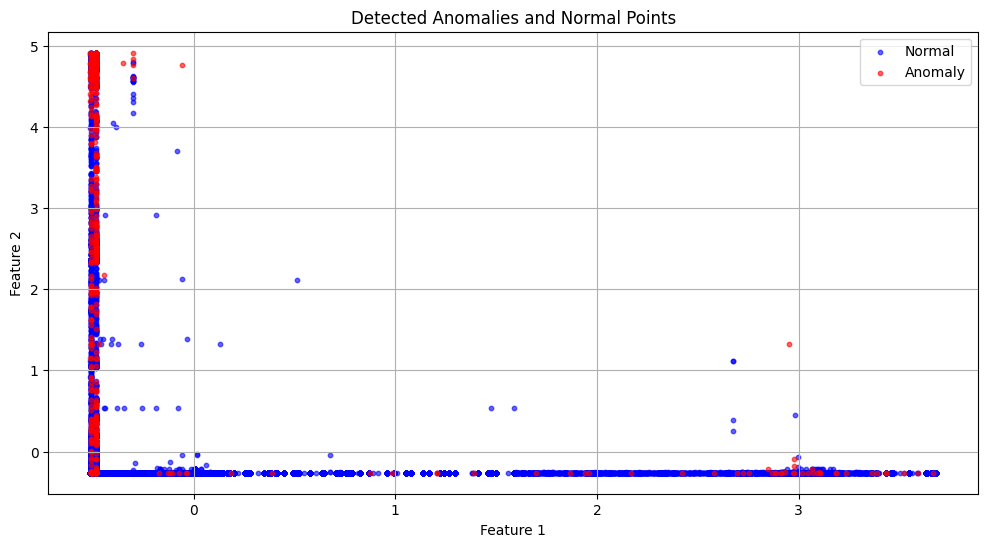

In [24]:
import matplotlib.pyplot as plt

# Plotting
plt.figure(figsize=(12, 6))

plt.scatter(X_test[:, 0][y_pred == 1], X_test[:, 1][y_pred == 1], c='blue', label='Normal', s=10, alpha=0.6)

plt.scatter(X_test[:, 0][y_pred == -1], X_test[:, 1][y_pred == -1], c='red', label='Anomaly', s=10, alpha=0.6)

plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Detected Anomalies and Normal Points')
plt.legend()
plt.grid(True)
plt.show()


In [18]:
from sklearn.ensemble import IsolationForest
from sklearn.metrics import accuracy_score, classification_report
import numpy as np

iso_forest = IsolationForest(n_estimators=100, contamination=0.01, random_state=42)
iso_forest.fit(X_train)

y_pred = iso_forest.predict(X_test)

print("Number of anomalies detected:", (y_pred == -1).sum())

iso_forest_predict = np.where(y_pred == -1, 1, 0)

accuracy = accuracy_score(y_test, iso_forest_predict)
print("Accuracy in separating Outliers:", accuracy)

unique_values, counts = np.unique(y_pred, return_counts=True)

for value, count in zip(unique_values, counts):
    print(f'Value: {value}, Count: {count}')


Number of anomalies detected: 439
Accuracy in separating Outliers: 0.5012928174267213
Value: -1, Count: 439
Value: 1, Count: 43264
